In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.svm import SVC
import pickle 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("dataset.csv")
df

,0.35867199301719666,0.8190932273864746,5.281586936689564e-07,0.4155340790748596,0.7879830598831177,-0.03356635943055153,0.4666382074356079,0.7277442812919617,-0.05586010962724686,0.5118821859359741,...,0.2750151455402374,0.5193837881088257,-0.08594155311584473,0.2552448511123657,0.46323639154434204,-0.09778134524822235,0.24060577154159546,0.4061579704284668,-0.10455761104822159,abrir
0,0.367801,0.829236,4.732217e-07,0.424064,0.812878,-0.034564,0.474579,0.761963,-0.055963,0.516686,...,0.300221,0.546980,-0.083158,0.283836,0.491546,-0.095299,0.271508,0.436664,-0.101871,abrir
1,0.378169,0.840884,4.626170e-07,0.434778,0.822853,-0.033195,0.483552,0.770545,-0.053648,0.524902,...,0.311662,0.555193,-0.081780,0.296001,0.499427,-0.093568,0.284812,0.444215,-0.099980,abrir
2,0.358156,0.816606,5.281317e-07,0.416254,0.787324,-0.033505,0.468927,0.727250,-0.055639,0.513819,...,0.278953,0.519979,-0.082317,0.259708,0.465111,-0.093577,0.244960,0.409683,-0.099592,abrir
3,0.366984,0.827797,4.269374e-07,0.422614,0.807616,-0.032468,0.470389,0.750047,-0.051260,0.511593,...,0.299714,0.537992,-0.074105,0.284550,0.482281,-0.086014,0.273699,0.427057,-0.092604,abrir
4,0.385573,0.845087,4.001955e-07,0.442687,0.827072,-0.030813,0.492803,0.775339,-0.049876,0.534581,...,0.328345,0.559368,-0.080052,0.313622,0.502456,-0.091830,0.303264,0.447777,-0.098318,abrir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cerrar
395,0.380495,0.644806,-3.341052e-07,0.428878,0.634654,-0.018863,0.479108,0.556479,-0.026710,0.488627,...,0.406090,0.443667,-0.056092,0.400388,0.505640,-0.050200,0.389185,0.492274,-0.041726,cerrar
396,0.385531,0.654720,-4.067371e-07,0.441095,0.644097,-0.019722,0.490565,0.572324,-0.029756,0.511303,...,0.411045,0.461502,-0.058773,0.405701,0.522240,-0.052138,0.393737,0.514538,-0.043123,cerrar
397,0.364563,0.676635,-3.624642e-07,0.413117,0.675213,-0.023397,0.468233,0.598219,-0.031574,0.497304,...,0.382021,0.478393,-0.051082,0.376922,0.539597,-0.044875,0.366938,0.530700,-0.035390,cerrar


In [6]:
df.columns = [x for x in range(df.shape[1])]
df = df.rename(columns={63:"resultado"})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,resultado
0,0.367801,0.829236,4.732217e-07,0.424064,0.812878,-0.034564,0.474579,0.761963,-0.055963,0.516686,...,0.300221,0.546980,-0.083158,0.283836,0.491546,-0.095299,0.271508,0.436664,-0.101871,abrir
1,0.378169,0.840884,4.626170e-07,0.434778,0.822853,-0.033195,0.483552,0.770545,-0.053648,0.524902,...,0.311662,0.555193,-0.081780,0.296001,0.499427,-0.093568,0.284812,0.444215,-0.099980,abrir
2,0.358156,0.816606,5.281317e-07,0.416254,0.787324,-0.033505,0.468927,0.727250,-0.055639,0.513819,...,0.278953,0.519979,-0.082317,0.259708,0.465111,-0.093577,0.244960,0.409683,-0.099592,abrir
3,0.366984,0.827797,4.269374e-07,0.422614,0.807616,-0.032468,0.470389,0.750047,-0.051260,0.511593,...,0.299714,0.537992,-0.074105,0.284550,0.482281,-0.086014,0.273699,0.427057,-0.092604,abrir
4,0.385573,0.845087,4.001955e-07,0.442687,0.827072,-0.030813,0.492803,0.775339,-0.049876,0.534581,...,0.328345,0.559368,-0.080052,0.313622,0.502456,-0.091830,0.303264,0.447777,-0.098318,abrir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cerrar
395,0.380495,0.644806,-3.341052e-07,0.428878,0.634654,-0.018863,0.479108,0.556479,-0.026710,0.488627,...,0.406090,0.443667,-0.056092,0.400388,0.505640,-0.050200,0.389185,0.492274,-0.041726,cerrar
396,0.385531,0.654720,-4.067371e-07,0.441095,0.644097,-0.019722,0.490565,0.572324,-0.029756,0.511303,...,0.411045,0.461502,-0.058773,0.405701,0.522240,-0.052138,0.393737,0.514538,-0.043123,cerrar
397,0.364563,0.676635,-3.624642e-07,0.413117,0.675213,-0.023397,0.468233,0.598219,-0.031574,0.497304,...,0.382021,0.478393,-0.051082,0.376922,0.539597,-0.044875,0.366938,0.530700,-0.035390,cerrar


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]



In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [9]:
print (X_train,y_train)


           0         1             2         3         4         5         6   \
376  0.373665  0.655802 -2.185914e-07  0.422206  0.644247 -0.019225  0.472320   
211  0.347624  0.825166  1.916418e-07  0.398504  0.757180 -0.008481  0.438428   
42   0.355200  0.837373  6.553119e-07  0.417025  0.810914 -0.040496  0.470726   
99   0.261871  0.716408  7.338233e-08  0.258495  0.588852 -0.006996  0.276733   
398  0.358855  0.644057 -3.185477e-07  0.407371  0.640581 -0.023631  0.457079   
..        ...       ...           ...       ...       ...       ...       ...   
265  0.349364  0.846422  1.612758e-07  0.404029  0.773993 -0.008532  0.446518   
158  0.278122  0.731421  2.627112e-08  0.275494  0.602727 -0.002535  0.296273   
299  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
383  0.363210  0.684069 -3.838034e-07  0.412509  0.666252 -0.019343  0.461230   
127  0.262033  0.718020  8.978291e-08  0.258726  0.593804 -0.007696  0.276906   

           7         8     

In [10]:
print (X_test,y_test)

           0         1             2         3         4         5         6   \
119  0.273847  0.713873 -1.002796e-08  0.267829  0.591015 -0.004498  0.283228   
331  0.390596  0.646651 -3.440520e-07  0.438472  0.639911 -0.016248  0.485493   
236  0.347213  0.841767  1.843118e-07  0.399633  0.768513 -0.008380  0.441350   
209  0.350112  0.840550  2.011156e-07  0.401648  0.770296 -0.009718  0.443022   
23   0.371202  0.832663  4.129693e-07  0.427188  0.810005 -0.031309  0.475223   
..        ...       ...           ...       ...       ...       ...       ...   
182  0.280549  0.726098  8.271219e-09  0.276700  0.600000 -0.005353  0.296677   
24   0.350300  0.835208  6.660521e-07  0.411427  0.808807 -0.041281  0.465661   
323  0.383367  0.746806 -2.998388e-07  0.439121  0.685894 -0.011682  0.477862   
190  0.279437  0.729070 -8.720698e-09  0.277332  0.601838 -0.003271  0.299072   
123  0.279037  0.729744 -1.646607e-08  0.277096  0.602826 -0.003591  0.298820   

           7         8     

In [11]:
#primer_modelo Super Vector Machine

primer_modelo = SVC()

primer_modelo.fit(X_train, y_train)


SVC()

In [12]:
#predicciones

predicciones = primer_modelo.predict (X_test)
predicciones

array(['siguiente', 'cerrar', 'pausa', 'pausa', 'abrir ', 'pausa',
       'abrir ', 'siguiente', 'cerrar', 'abrir ', 'cerrar', 'abrir ',
       'abrir ', 'cerrar', 'pausa', 'siguiente', 'siguiente', 'cerrar',
       'abrir ', 'siguiente', 'cerrar', 'abrir ', 'abrir ', 'pausa',
       'abrir ', 'abrir ', 'pausa', 'abrir ', 'cerrar', 'siguiente',
       'siguiente', 'cerrar', 'siguiente', 'siguiente', 'cerrar',
       'siguiente', 'siguiente', 'abrir ', 'abrir ', 'cerrar',
       'siguiente', 'abrir ', 'cerrar', 'abrir ', 'pausa', 'siguiente',
       'abrir ', 'abrir ', 'siguiente', 'pausa', 'cerrar', 'abrir ',
       'abrir ', 'abrir ', 'cerrar', 'abrir ', 'siguiente', 'pausa',
       'pausa', 'abrir ', 'pausa', 'cerrar', 'siguiente', 'siguiente',
       'pausa', 'siguiente', 'siguiente', 'abrir ', 'siguiente', 'cerrar',
       'siguiente', 'siguiente', 'pausa', 'abrir ', 'abrir ', 'pausa',
       'pausa', 'siguiente', 'cerrar', 'pausa', 'pausa', 'pausa',
       'siguiente', 'abrir ', '

In [13]:
print (list(y_test))


['siguiente', 'cerrar', 'pausa', 'pausa', 'abrir ', 'pausa', 'abrir ', 'siguiente', 'cerrar', 'abrir ', 'cerrar', 'abrir ', 'abrir ', 'cerrar', 'pausa', 'siguiente', 'siguiente', 'cerrar', 'abrir ', 'siguiente', 'cerrar', 'abrir ', 'abrir ', 'pausa', 'abrir ', 'abrir ', 'pausa', 'abrir ', 'cerrar', 'siguiente', 'siguiente', 'cerrar', 'siguiente', 'siguiente', 'cerrar', 'siguiente', 'siguiente', 'abrir ', 'abrir ', 'cerrar', 'siguiente', 'abrir ', 'cerrar', 'abrir ', 'pausa', 'siguiente', 'abrir ', 'abrir ', 'siguiente', 'pausa', 'cerrar', 'abrir ', 'abrir ', 'abrir ', 'cerrar', 'abrir ', 'siguiente', 'pausa', 'pausa', 'abrir ', 'pausa', 'cerrar', 'siguiente', 'siguiente', 'pausa', 'siguiente', 'siguiente', 'abrir ', 'siguiente', 'cerrar', 'siguiente', 'siguiente', 'pausa', 'abrir ', 'abrir ', 'pausa', 'pausa', 'siguiente', 'cerrar', 'pausa', 'pausa', 'pausa', 'siguiente', 'abrir ', 'cerrar', 'pausa', 'cerrar', 'siguiente', 'abrir ', 'siguiente', 'pausa', 'pausa', 'siguiente', 'abrir ',

In [14]:
#comprobar que estaba bien utilizando 

np.array (predicciones== y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

<AxesSubplot: title={'center': 'Matriz de Confusion'}>

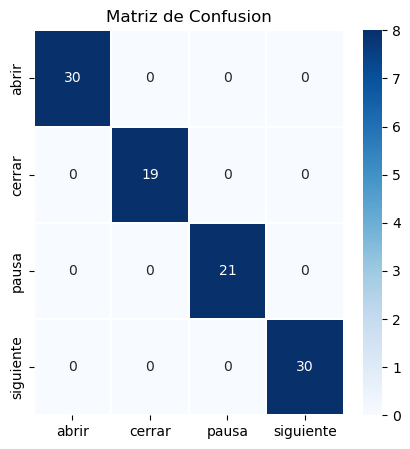

In [15]:
#matriz de confusion

etiquetas = ("abrir","cerrar","pausa","siguiente")
matriz_confusion = confusion_matrix(y_test, predicciones)
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_title("Matriz de Confusion")

maping = sns.heatmap(matriz_confusion, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=etiquetas,
                     yticklabels=etiquetas, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [16]:
with open('modelo.pkl','wb') as fw:
    pickle.dump(primer_modelo,fw) #guardar el modelo

In [17]:
#Segundo modelo Random Forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [18]:
# Crear el modelo con 100 árboles y un máximo de profundidad de 5 niveles
segundo_modelo = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
segundo_modelo.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [19]:
# Realizar predicciones con los datos de prueba
y_pred = segundo_modelo.predict(X_test)


In [20]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))


Precisión del modelo: 100.00%


In [21]:
with open('modelo2.pkl','wb') as fw:
    pickle.dump(segundo_modelo,fw) #guardar el modelo